## Gaussian Mixuture

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("./Datos/Gaussian_Mixture.csv")

## Trabajando con el K-Means

In [4]:
from sklearn.cluster import KMeans

In [5]:
df.head()

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679


In [6]:
df.corr()

,Weight,Height
Weight,1.000000,0.957441
Height,0.957441,1.000000


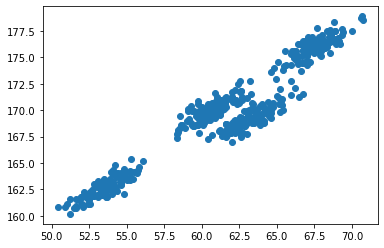

In [7]:
plt.scatter(df.Weight,df.Height)

In [8]:
import seaborn as sns

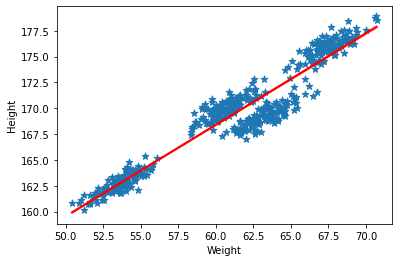

In [16]:
import numpy as np
sns.regplot(x="Weight",y="Height",data=df,line_kws=dict(color="r"),marker="*");#,x_estimator=np.mean);

In [10]:
kmeans=KMeans(n_clusters=4)

In [18]:
kmeans.fit(df)

KMeans(n_clusters=4)

In [19]:
pred=kmeans.predict(df)

In [20]:
df["Cluster"]=pred

In [21]:
df.head()

,Weight,Height,Cluster
0,67.062924,176.086355,2
1,68.804094,178.388669,2
2,60.930863,170.284496,3
3,59.733843,168.691992,3
4,65.431230,173.763679,2


In [22]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
arbol=DecisionTreeClassifier(random_state=42)
arbol.fit(df.drop(columns="Cluster"),df["Cluster"])

DecisionTreeClassifier(random_state=42)

In [28]:
arbol.feature_importances_

array([0.65470964, 0.34529036])

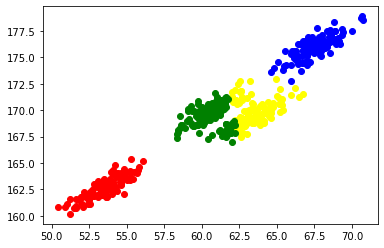

In [29]:
color=["red","yellow","blue","green"]
for k in range(4):
    df_aux=df[df["Cluster"]==k]
    plt.scatter(df_aux["Weight"],
                df_aux["Height"],
                c=color[k])
plt.show()

In [91]:
### Elimino la variable Cluster del dataframe obtenido por kmeans
del df["Cluster"]

In [92]:
from sklearn.mixture import GaussianMixture

In [93]:
gm=GaussianMixture(n_components=3)
gm.fit(df)

GaussianMixture(n_components=3)

In [94]:
## Media de cada 
gm.means_

array([[ 67.51790829, 175.98376384],
       [ 53.60033358, 162.76481242],
       [ 61.98009686, 169.65582731]])

In [95]:
## Media de covarianza 
gm.covariances_

array([[[1.29074018, 0.95716497],
        [0.95716497, 1.11963551]],

       [[1.2492903 , 0.95692202],
        [0.95692202, 1.02841322]],

       [[3.1962323 , 0.5622464 ],
        [0.5622464 , 1.27703526]]])

In [96]:
## Pesos
gm.weights_

array([0.2501151, 0.2500008, 0.4998841])

In [97]:
from sklearn.metrics import silhouette_score

In [98]:
## Oh no podemos pq no tenemos target
# silhouette_score()

In [99]:
df["Cluster"]=gm.predict(df)

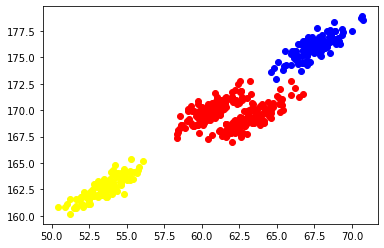

In [100]:
color=["blue","yellow","red","green"]
for k in range(0,4):
    df_aux=df[df["Cluster"]==k]
    plt.scatter(df_aux["Weight"],df_aux["Height"],c=color[k])
plt.show()

In [101]:
arbol=DecisionTreeClassifier(random_state=42)
arbol.fit(df.drop(columns="Cluster"),df["Cluster"])

DecisionTreeClassifier(random_state=42)

In [102]:
arbol.feature_importances_

array([0.46666667, 0.53333333])

In [103]:
silhouette_score(df.drop(columns="Cluster"),df["Cluster"])

0.7309359929227244

In [105]:
del df["Cluster"]

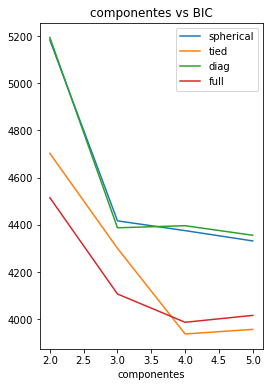

In [109]:
componentes=range(2,6)
covarianzas=["spherical","tied","diag","full"]
fig,ax=plt.subplots(figsize=(4,6))
for tipo in covarianzas:
    valores_bic=[]
    for j in componentes:
        modelo=GaussianMixture(n_components=j,covariance_type=tipo,random_state=42)
        modelo.fit(df)
        valores_bic.append(modelo.bic(df))
    ax.plot(componentes,valores_bic,label=tipo)
ax.set_title("componentes vs BIC")
ax.set_xlabel("componentes")
ax.legend();


In [110]:
modelo

GaussianMixture(n_components=5, random_state=42)

In [113]:
np.exp(modelo.score_samples(df))*100

array([3.93125367, 0.23591902, 5.6006767 , 2.29956676, 0.62625374,
       2.12805186, 0.39093474, 5.10989778, 1.0922154 , 5.63928671,
       4.59544142, 3.23367115, 1.09064228, 4.99209582, 3.42975256,
       2.28707067, 3.23881621, 5.57067662, 4.25636607, 5.53763459,
       2.81886014, 2.6545957 , 3.11892454, 4.69595713, 5.54612609,
       3.80906021, 1.47958321, 4.52316078, 2.2989664 , 0.71489795,
       2.85228415, 1.34809434, 1.98333957, 2.18511885, 3.76615084,
       0.07881768, 4.20522271, 1.56724331, 1.08846882, 3.78065405,
       0.80895707, 0.30915587, 2.1554419 , 1.52134224, 3.51477496,
       3.44487519, 1.13204413, 4.57103938, 3.57143752, 4.59165527,
       6.28885023, 4.51785682, 0.19681046, 1.93023323, 1.34781173,
       1.19986459, 3.06076554, 3.47651184, 0.24477796, 5.16443693,
       5.33809389, 4.42871855, 5.09939471, 5.01870103, 2.71208576,
       0.35265729, 2.05267024, 4.51570018, 5.44174453, 2.12807038,
       1.35589657, 1.61978605, 2.26627951, 4.2979813 , 0.95277

In [114]:
## Creamos un mallado dentro del rago de valores observados
x=np.linspace(min(df["Weight"])*0.8,max(df["Weight"])*1.2,1000)
y=np.linspace(min(df["Height"])*0.8,max(df["Height"])*1.2,1000)
xx,yy=np.meshgrid(x,y)

In [131]:
xx.shape

(1000, 1000)

In [116]:
score=modelo.score_samples(np.c_[xx.ravel(),yy.ravel()])
score=np.exp(score)

c:\Users\Daniel Montes\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


In [117]:
score

array([0., 0., 0., ..., 0., 0., 0.])

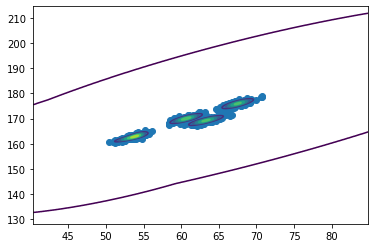

In [123]:
fig,ax=plt.subplots()
ax.scatter(df["Weight"],df["Height"])
ax.contour(xx,yy,score.reshape(xx.shape))

In [124]:
log=modelo.score_samples(df)

In [125]:
df_resultado=df.copy()
df_resultado["log_proba"]=log

In [127]:
df_resultado.sort_values(by="log_proba",ascending=True)

,Weight,Height,log_proba
344,65.939308,172.791283,-8.162067
384,54.837431,162.043844,-7.579951
35,70.691774,178.894770,-7.145788
433,65.177345,172.014466,-6.965873
429,70.700456,178.565955,-6.875297
...,...,...,...
256,53.602658,162.692489,-2.734506
90,53.713774,162.853079,-2.728256
110,53.998487,163.000888,-2.721909
89,53.882288,162.991110,-2.721807
